<a href="https://colab.research.google.com/github/kashafali8/Deep_Reinforcement_Learning_A2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIPI 590: Deep Reinforecement Learning**
### *Kashaf Ali*

### Question 2: Implement DQN and double DQN and compare the performance of both

### Set up 

Installation

*   Use Master Version of SB3

In [1]:
%%capture
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines3[extra] pyglet==1.5.27


*  Import DQN and Evaluation Helper



In [2]:
import gym
import numpy as np
import torch as th
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

### **Part 1: Training Vanilla DQN**

*   use default enable_double_dqn value = False

**Step 1:** Create the Environments (Training & Evaluation)

In [3]:
## Training environment of Cartpole
train_env = gym.make('MountainCar-v0')

## Evalutation environment of Cartpole
evaluation_env = gym.make('MountainCar-v0')

In [4]:
tensorboard_log = "data/tb/"

**Step 2:** Evaluate the Agent before Training

In [5]:
dqn_vanilla = DQN("MlpPolicy",
              train_env,
              verbose=1,
              train_freq=16,
              gradient_steps=8,
              gamma=0.99,
              exploration_fraction=0.2,
              exploration_final_eps=0.07,
              target_update_interval=600,
              learning_starts=1000,
              buffer_size=10000,
              batch_size=128,
              learning_rate=4e-3,
              policy_kwargs=dict(net_arch=[256, 256]),
              tensorboard_log=tensorboard_log,
              seed=2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
mean_reward, std_reward = evaluate_policy(dqn_vanilla, evaluation_env, deterministic=True, n_eval_episodes=100)

print(f"Mean Reward for Vanilla DQN:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean Reward for Vanilla DQN:-200.00 +/- 0.00


In [ ]:
# Optional: Monitor training in tensorboard
# %load_ext tensorboard
# %tensorboard --logdir $tensorboard_log

**Step 3:** Train the agent until convergence and then analyse the learned q-value function.

In [10]:
dqn_vanilla.learn(int(1.2e5), log_interval=10)

Logging to data/tb/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 206      |
|    time_elapsed     | 9        |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.246    |
|    n_updates        | 53056    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 211      |
|    time_elapsed     | 18       |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.137 

**Step 4:** Evaluate after training, the mean episodic reward should have improved.

In [22]:
mean_reward, std_reward = evaluate_policy(dqn_vanilla, evaluation_env, deterministic=True, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:-200.00 +/- 0.00


Mean episodic reward has improved from -200 to -187.99

**Step 5:** Video Recording

In [18]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [19]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay


def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [20]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=False)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

Step 6: Visualize trained agent

In [21]:
record_video('MountainCar-v0', dqn_vanilla, video_length=500, prefix='dqn-mountaincar')

Saving video to /content/videos/dqn-mountaincar-step-0-to-step-500.mp4


In [23]:
show_videos('videos', prefix='dqn')

**Step 7:** Visualize Q-values

**Exercise (5 minutes): Retrieve q-values**

The function will be used to retrieve the learned q-values for a given state (`observation` in the code).

The q-network from SB3 DQN can be accessed via `model.q_net` and is a PyTorch module (you can therefore call `.forward()` on it).

You need to convert the observation to a PyTorch tensor and then convert the resulting q-values to numpy array.

Note: It is recommended to use `with th.no_grad():` context to save computation and memory

In [24]:
def get_q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
    """
    Retrieve Q-values for a given observation.

    :param model: a DQN model
    :param obs: a single observation
    :return: the associated q-values for the given observation
    """
    assert model.get_env().observation_space.contains(obs), f"Invalid observation of shape {obs.shape}: {obs}"
    ### YOUR CODE HERE
    
    # Retrieve q-values for the given observation and convert them to numpy
    with th.no_grad():
      ## Create a tensor of the observation numpy array
      obs_tensor = th.from_numpy(obs).unsqueeze(0)

      ## Pass the observation through the Q network to fetch the Q Values
      q_values = dqn_vanilla.q_net(obs_tensor)
      
      ## Convert Q values tensor to numpy array
      q_values = q_values.squeeze().numpy()
    
    ### END OF YOUR CODE
    assert isinstance(q_values, np.ndarray), "The returned q_values is not a numpy array"
    assert q_values.shape == (3,), f"Wrong shape: (3,) was expected but got {q_values.shape}"

    return q_values

Q-values for the initial state:

* Let's reset the environment to start a new episode:


In [25]:
obs = train_env.reset()

* we plot the rendered environment to visualize it

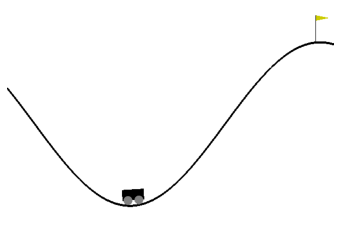

In [26]:
plt.axis('off')
plt.imshow(train_env.render(mode="rgb_array"))

**Exercise (5 minutes)- predict taken action according to q-values**

Using the `get_q_values()` function, retrieve the q-values for the initial observation, print them for each action ("left", "nothing", "right") and print the action that the greedy (deterministic) policy would follow (i.e., the action with the highest q-value for that state).

In [27]:
action_str = ["Left", "Nothing", "Right"]  # action=0 -> go left, action=1 -> do nothing, action=2 -> go right

In [28]:
### YOUR CODE HERE
# Retrieve q-values for the initial state
# You should use `get_q_values()`

## Getting the Q values using our function
q_values = get_q_values(dqn_vanilla, obs)

## Unwrapping the Q values
q_value_left, q_value_nothing, q_value_right = q_values

### END OF YOUR CODE

print(f"Q-value of the initial state left={q_value_left:.2f} nothing={q_value_nothing:.2f} right={q_value_right:.2f}")

### YOUR CODE HERE
# Compute the action taken in the initilal state according to q-values 
# when following a greedy strategy

action = np.argmax(q_values)

## END of your code here

print(f"Action taken by the greedy policy in the initial state: {action_str[action]}")

Q-value of the initial state left=-67.94 nothing=-67.89 right=-67.78
Action taken by the greedy policy in the initial state: Right


The q-value of the initial state corresponds to how much (discounted) reward the agent expects to get in this episode.

We will compare the estimated q-value to the discounted return of the episode.

In [29]:
initial_q_value = q_values.max()

**Step 8:** Step until the end of the episode


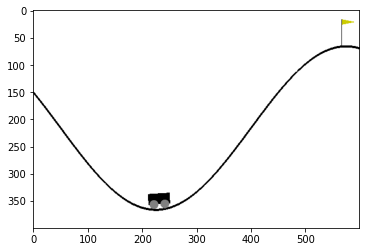

Q-value of the current state left=-67.94 nothing=-67.89 right=-67.78
Action: Right


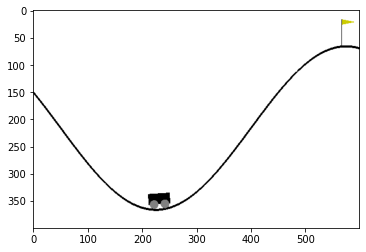

Q-value of the current state left=-68.04 nothing=-68.00 right=-67.87
Action: Right


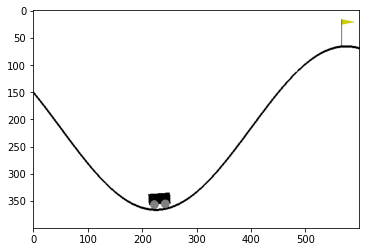

Q-value of the current state left=-67.77 nothing=-67.74 right=-67.59
Action: Right


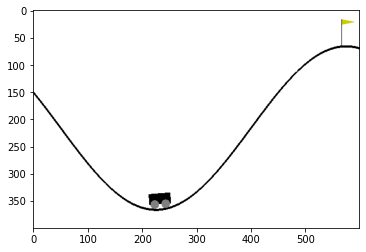

Q-value of the current state left=-67.09 nothing=-67.06 right=-66.87
Action: Right


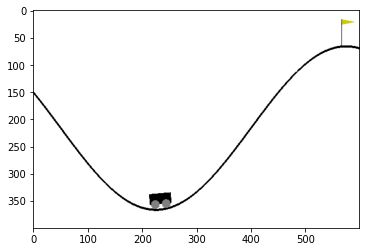

Q-value of the current state left=-66.35 nothing=-66.32 right=-66.08
Action: Right


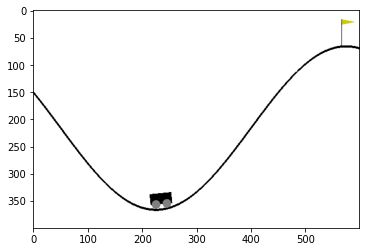

Q-value of the current state left=-65.78 nothing=-65.76 right=-65.50
Action: Right


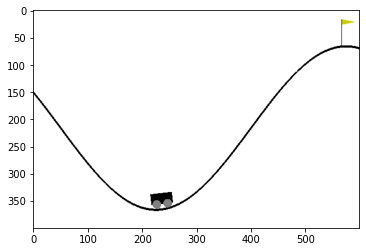

Q-value of the current state left=-65.25 nothing=-65.25 right=-64.97
Action: Right


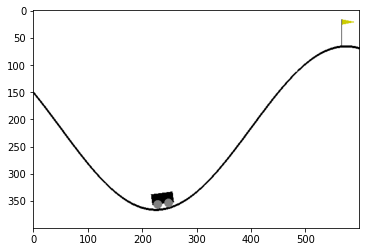

Q-value of the current state left=-64.68 nothing=-64.69 right=-64.40
Action: Right


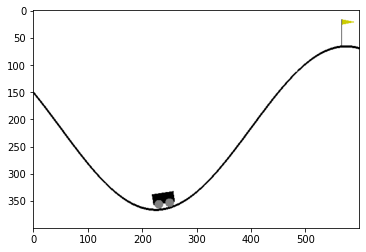

Q-value of the current state left=-64.08 nothing=-64.08 right=-63.79
Action: Right


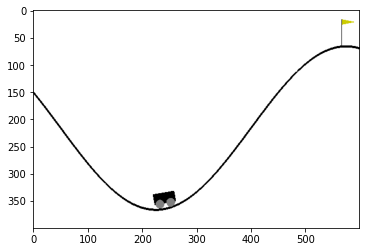

Q-value of the current state left=-63.35 nothing=-63.37 right=-63.06
Action: Right


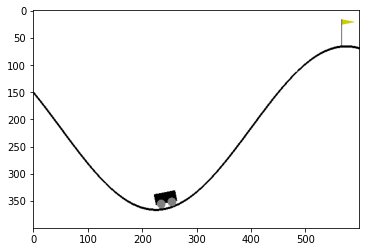

Q-value of the current state left=-62.48 nothing=-62.50 right=-62.19
Action: Right


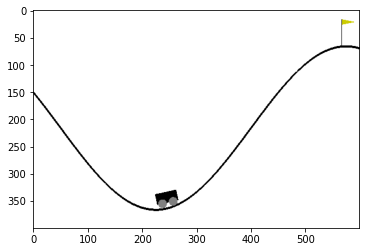

Q-value of the current state left=-61.61 nothing=-61.64 right=-61.32
Action: Right


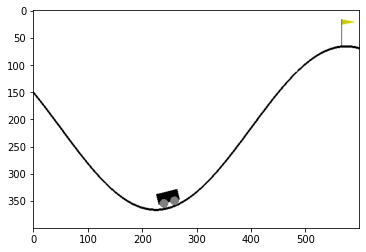

Q-value of the current state left=-60.74 nothing=-60.77 right=-60.45
Action: Right


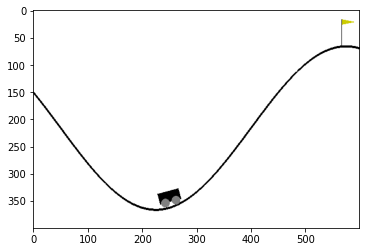

Q-value of the current state left=-59.91 nothing=-59.94 right=-59.61
Action: Right


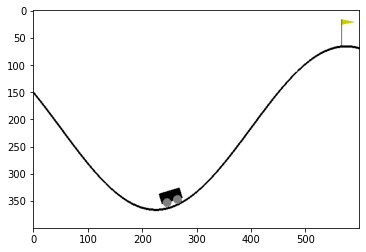

Q-value of the current state left=-59.27 nothing=-59.31 right=-58.98
Action: Right


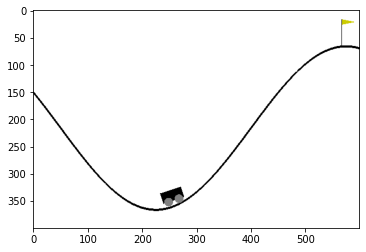

Q-value of the current state left=-58.68 nothing=-58.72 right=-58.39
Action: Right


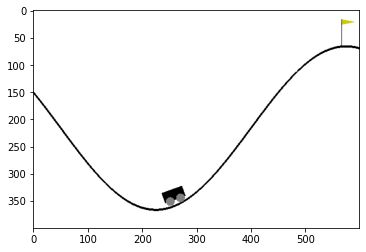

Q-value of the current state left=-58.14 nothing=-58.17 right=-57.84
Action: Right


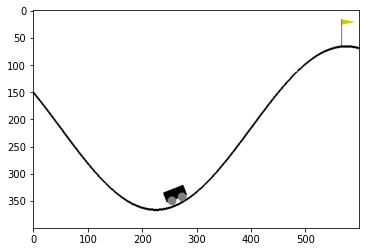

Q-value of the current state left=-57.65 nothing=-57.67 right=-57.34
Action: Right


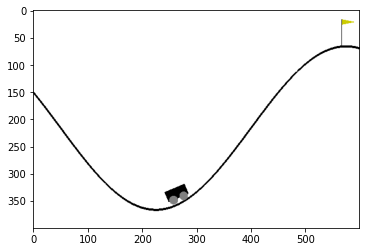

Q-value of the current state left=-57.21 nothing=-57.22 right=-56.90
Action: Right


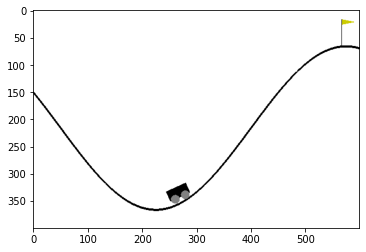

Q-value of the current state left=-56.83 nothing=-56.84 right=-56.52
Action: Right


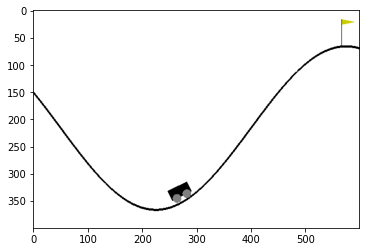

Q-value of the current state left=-56.37 nothing=-56.37 right=-56.06
Action: Right


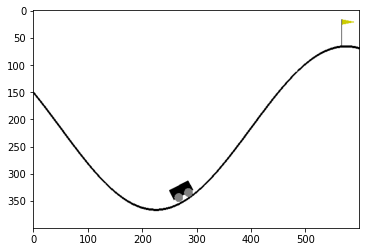

Q-value of the current state left=-55.70 nothing=-55.70 right=-55.40
Action: Right


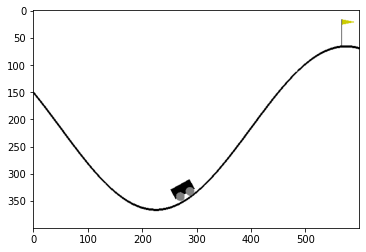

Q-value of the current state left=-55.07 nothing=-55.07 right=-54.77
Action: Right


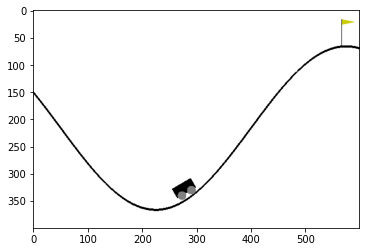

Q-value of the current state left=-54.49 nothing=-54.49 right=-54.19
Action: Right


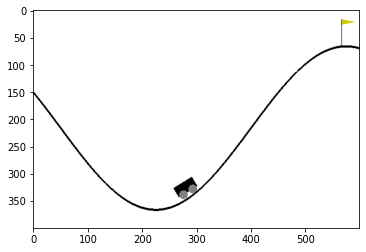

Q-value of the current state left=-53.96 nothing=-53.94 right=-53.66
Action: Right


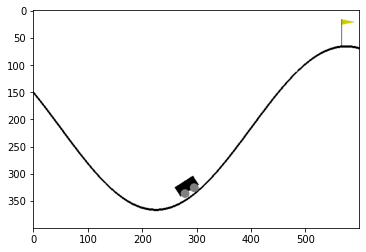

Q-value of the current state left=-53.47 nothing=-53.45 right=-53.17
Action: Right


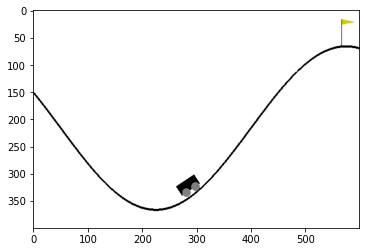

Q-value of the current state left=-53.00 nothing=-52.98 right=-52.71
Action: Right


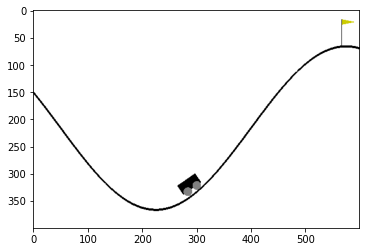

Q-value of the current state left=-52.42 nothing=-52.39 right=-52.13
Action: Right


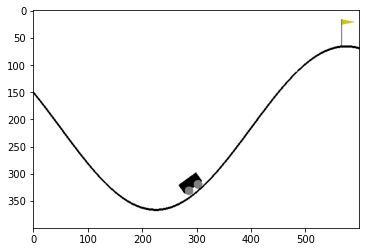

Q-value of the current state left=-51.88 nothing=-51.85 right=-51.59
Action: Right


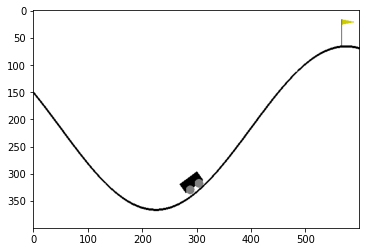

Q-value of the current state left=-51.51 nothing=-51.50 right=-51.27
Action: Right


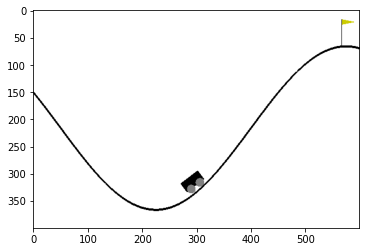

Q-value of the current state left=-51.33 nothing=-51.32 right=-51.13
Action: Right


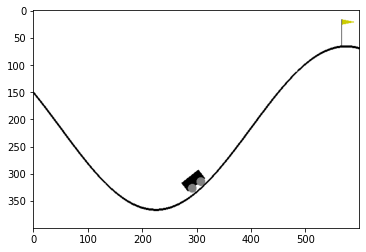

Q-value of the current state left=-50.73 nothing=-50.74 right=-50.57
Action: Right


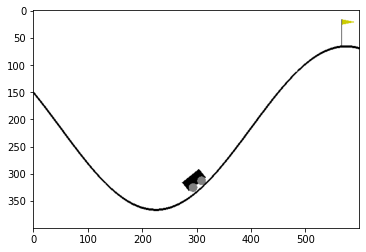

Q-value of the current state left=-50.17 nothing=-50.20 right=-50.04
Action: Right


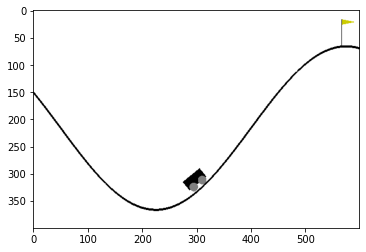

Q-value of the current state left=-49.66 nothing=-49.70 right=-49.56
Action: Right


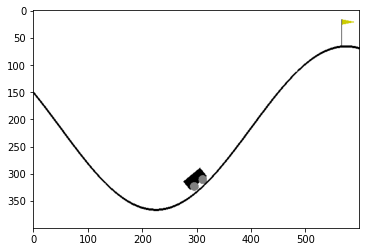

Q-value of the current state left=-49.20 nothing=-49.25 right=-49.12
Action: Right


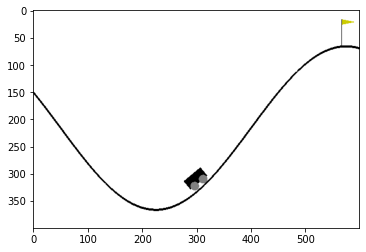

Q-value of the current state left=-48.79 nothing=-48.84 right=-48.74
Action: Right


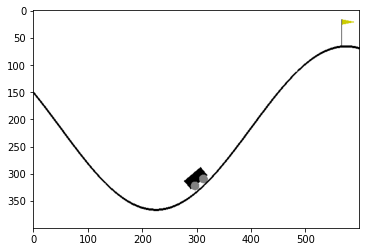

Q-value of the current state left=-48.44 nothing=-48.49 right=-48.40
Action: Right


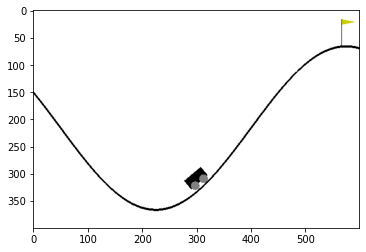

Q-value of the current state left=-48.32 nothing=-48.37 right=-48.28
Action: Right


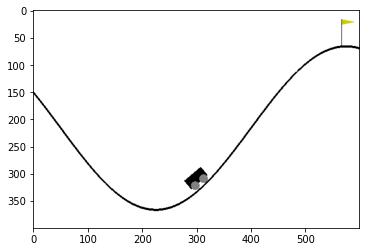

Q-value of the current state left=-48.29 nothing=-48.34 right=-48.26
Action: Right


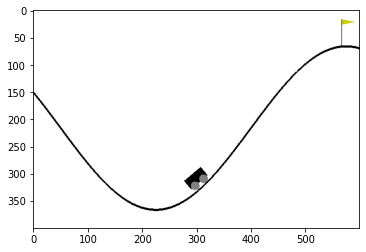

Q-value of the current state left=-48.33 nothing=-48.37 right=-48.29
Action: Right


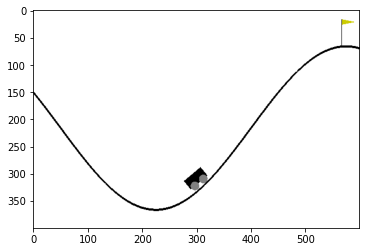

Q-value of the current state left=-48.42 nothing=-48.46 right=-48.37
Action: Right


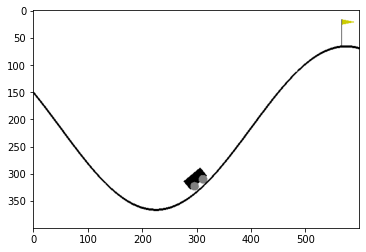

Q-value of the current state left=-48.56 nothing=-48.59 right=-48.50
Action: Right


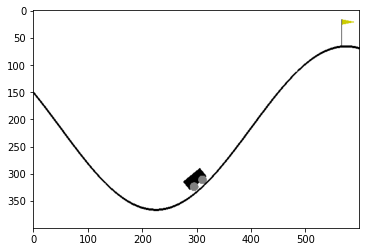

Q-value of the current state left=-48.76 nothing=-48.78 right=-48.69
Action: Right


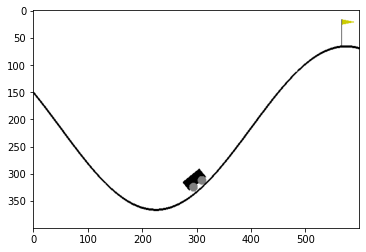

Q-value of the current state left=-49.02 nothing=-49.02 right=-48.92
Action: Right


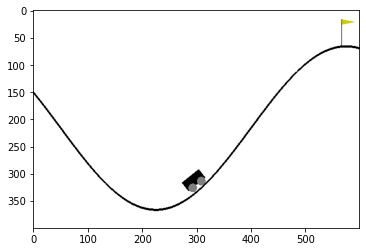

Q-value of the current state left=-49.32 nothing=-49.31 right=-49.20
Action: Right


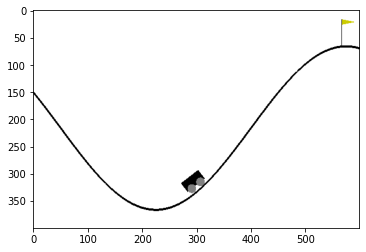

Q-value of the current state left=-49.68 nothing=-49.65 right=-49.53
Action: Right


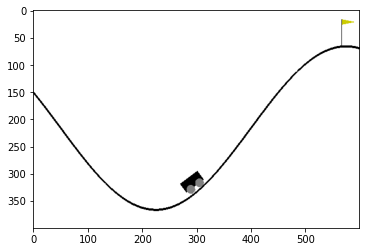

Q-value of the current state left=-50.12 nothing=-50.07 right=-49.94
Action: Right


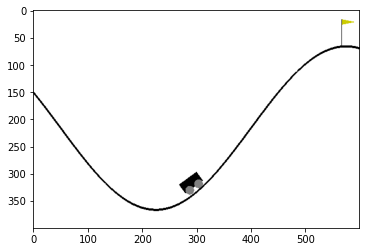

Q-value of the current state left=-50.73 nothing=-50.69 right=-50.57
Action: Right


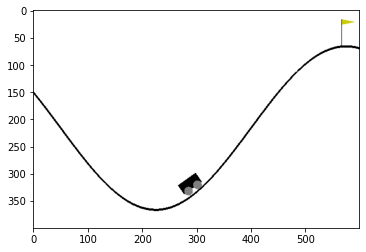

Q-value of the current state left=-51.40 nothing=-51.36 right=-51.25
Action: Right


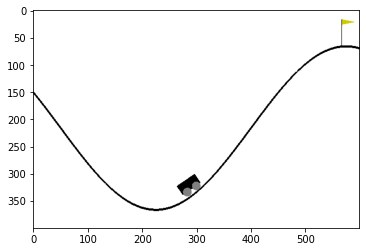

Q-value of the current state left=-52.24 nothing=-52.20 right=-52.11
Action: Right


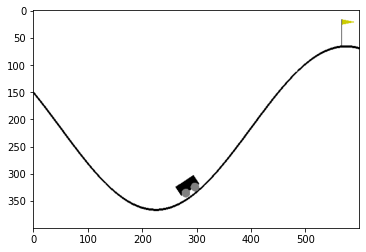

Q-value of the current state left=-53.23 nothing=-53.20 right=-53.15
Action: Right


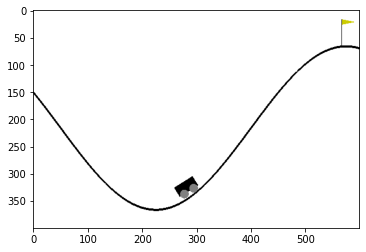

Q-value of the current state left=-54.25 nothing=-54.22 right=-54.21
Action: Right


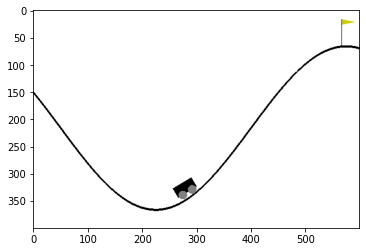

Q-value of the current state left=-55.30 nothing=-55.27 right=-55.29
Action: Nothing


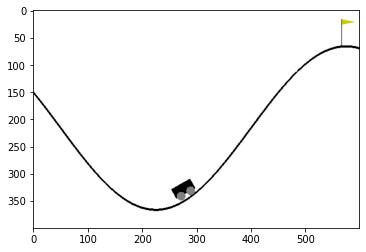

Q-value of the current state left=-56.63 nothing=-56.62 right=-56.72
Action: Nothing


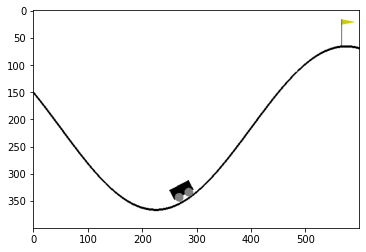

Q-value of the current state left=-57.16 nothing=-57.16 right=-57.30
Action: Nothing


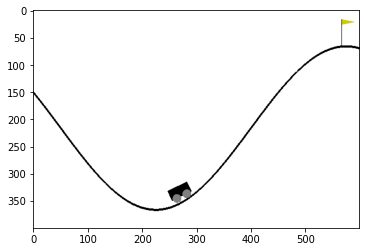

Q-value of the current state left=-57.70 nothing=-57.70 right=-57.86
Action: Nothing


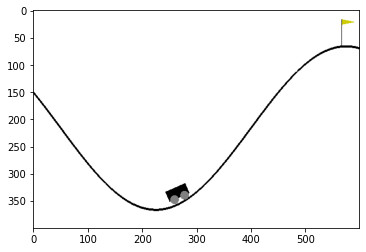

Q-value of the current state left=-58.65 nothing=-58.66 right=-58.88
Action: Left


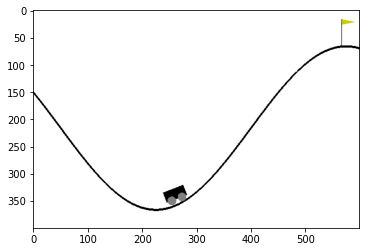

Q-value of the current state left=-59.71 nothing=-59.76 right=-60.08
Action: Left


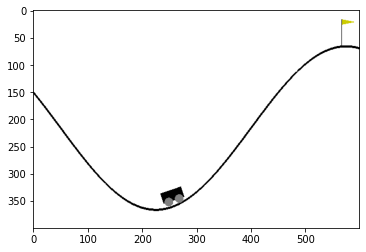

Q-value of the current state left=-59.47 nothing=-59.55 right=-59.87
Action: Left


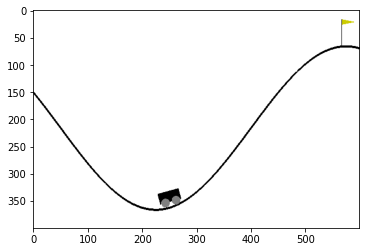

Q-value of the current state left=-59.57 nothing=-59.69 right=-60.01
Action: Left


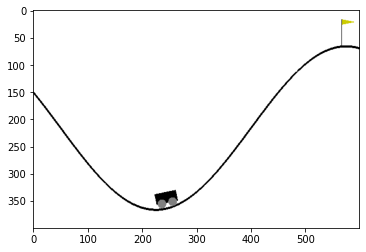

Q-value of the current state left=-59.83 nothing=-60.00 right=-60.32
Action: Left


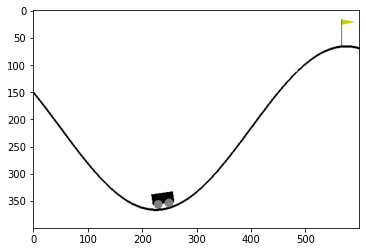

Q-value of the current state left=-60.15 nothing=-60.36 right=-60.68
Action: Left


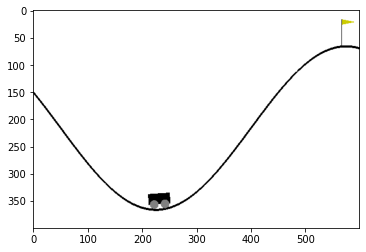

Q-value of the current state left=-60.35 nothing=-60.62 right=-60.93
Action: Left


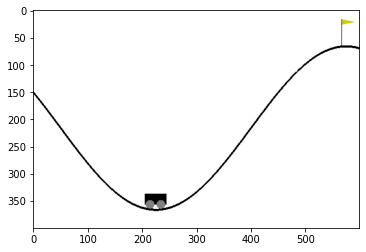

Q-value of the current state left=-59.95 nothing=-60.26 right=-60.59
Action: Left


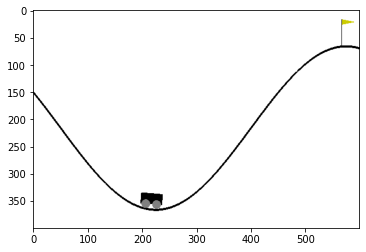

Q-value of the current state left=-59.78 nothing=-60.15 right=-60.55
Action: Left


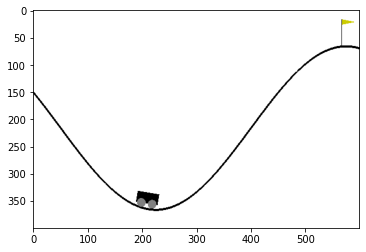

Q-value of the current state left=-59.33 nothing=-59.75 right=-60.18
Action: Left


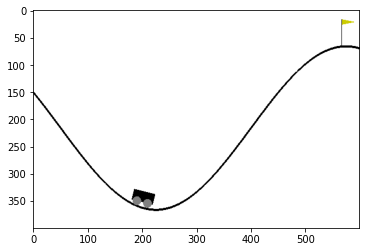

Q-value of the current state left=-57.94 nothing=-58.36 right=-58.75
Action: Left


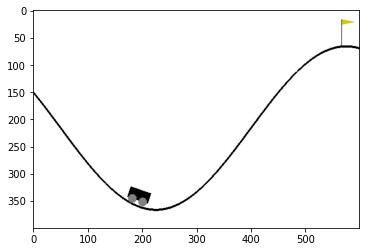

Q-value of the current state left=-56.70 nothing=-57.13 right=-57.49
Action: Left


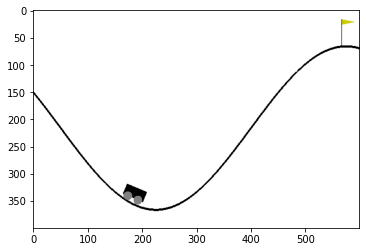

Q-value of the current state left=-55.62 nothing=-56.04 right=-56.37
Action: Left


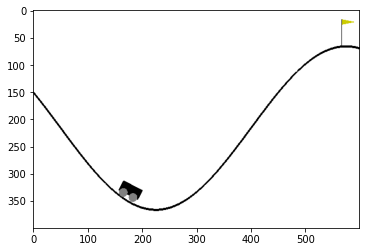

Q-value of the current state left=-54.98 nothing=-55.35 right=-55.60
Action: Left


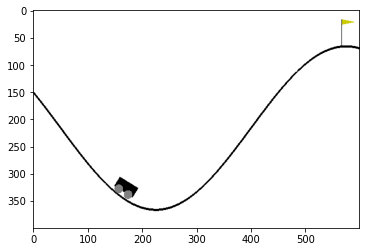

Q-value of the current state left=-53.39 nothing=-53.70 right=-53.88
Action: Left


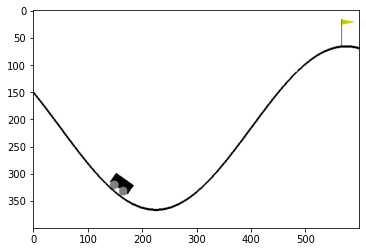

Q-value of the current state left=-51.72 nothing=-51.97 right=-52.07
Action: Left


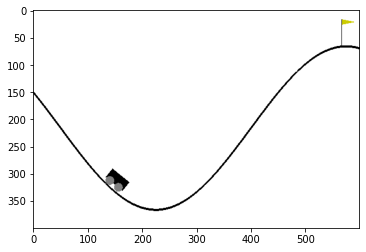

Q-value of the current state left=-53.31 nothing=-53.46 right=-53.43
Action: Left


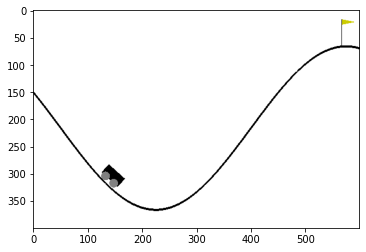

Q-value of the current state left=-54.12 nothing=-54.18 right=-54.04
Action: Right


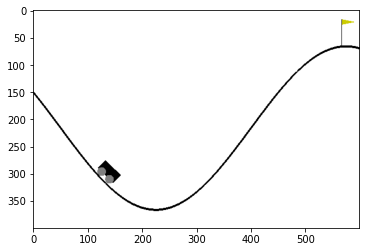

Q-value of the current state left=-56.95 nothing=-56.98 right=-56.85
Action: Right


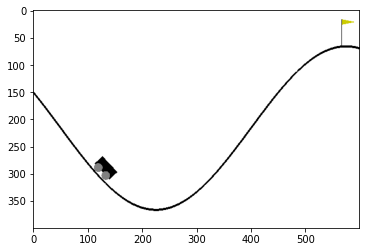

Q-value of the current state left=-56.44 nothing=-56.50 right=-56.39
Action: Right


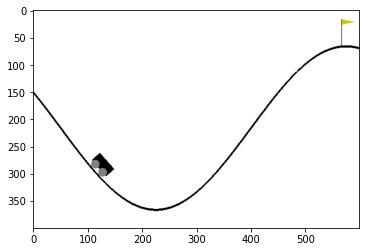

Q-value of the current state left=-57.02 nothing=-57.09 right=-56.98
Action: Right


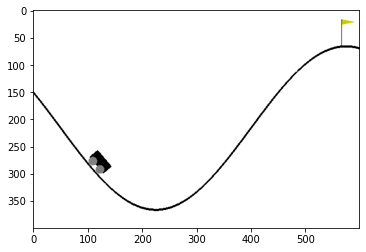

Q-value of the current state left=-56.47 nothing=-56.59 right=-56.49
Action: Left


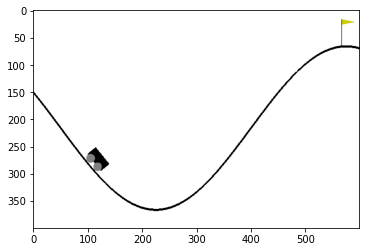

Q-value of the current state left=-55.32 nothing=-55.46 right=-55.37
Action: Left


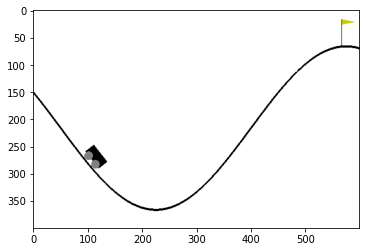

Q-value of the current state left=-54.28 nothing=-54.45 right=-54.36
Action: Left


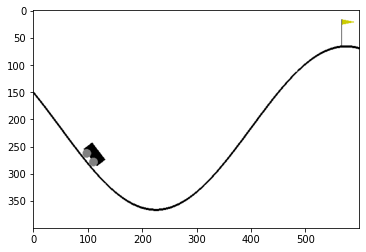

Q-value of the current state left=-53.36 nothing=-53.56 right=-53.48
Action: Left


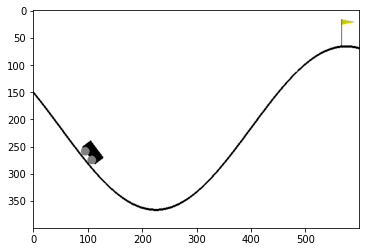

Q-value of the current state left=-52.51 nothing=-52.73 right=-52.66
Action: Left


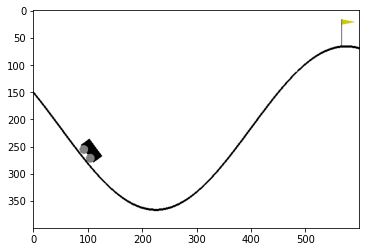

Q-value of the current state left=-52.06 nothing=-52.31 right=-52.24
Action: Left


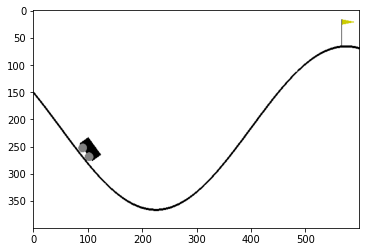

Q-value of the current state left=-52.60 nothing=-52.86 right=-52.79
Action: Left


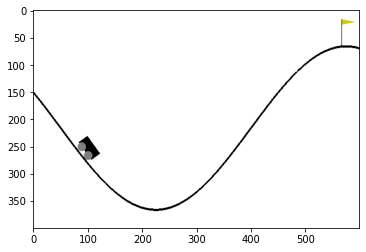

Q-value of the current state left=-53.31 nothing=-53.57 right=-53.49
Action: Left


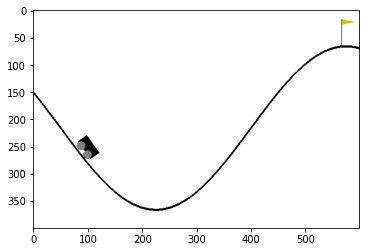

Q-value of the current state left=-54.15 nothing=-54.42 right=-54.33
Action: Left


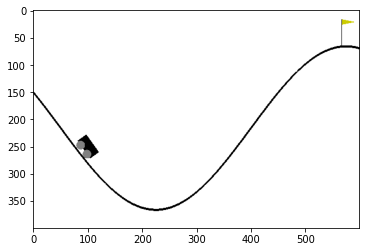

Q-value of the current state left=-55.15 nothing=-55.42 right=-55.33
Action: Left


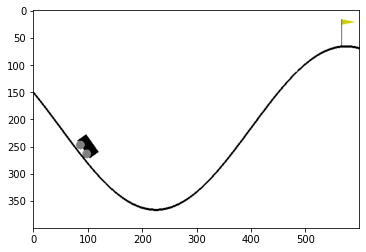

Q-value of the current state left=-56.31 nothing=-56.57 right=-56.48
Action: Left


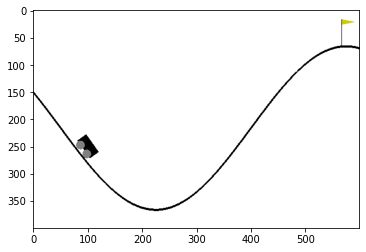

Q-value of the current state left=-57.50 nothing=-57.76 right=-57.67
Action: Left


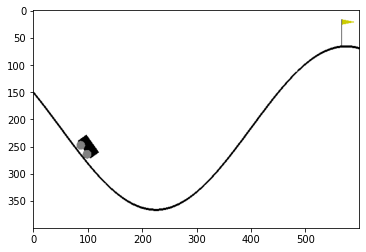

Q-value of the current state left=-58.20 nothing=-58.46 right=-58.36
Action: Left


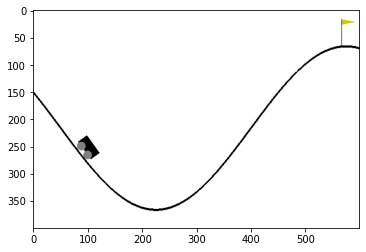

Q-value of the current state left=-58.46 nothing=-58.73 right=-58.62
Action: Left


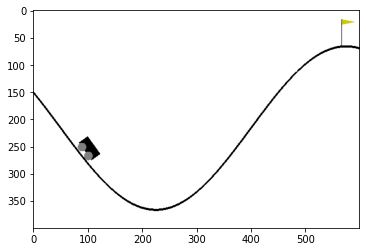

Q-value of the current state left=-58.41 nothing=-58.69 right=-58.58
Action: Left


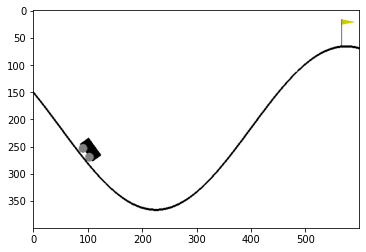

Q-value of the current state left=-57.97 nothing=-58.26 right=-58.14
Action: Left


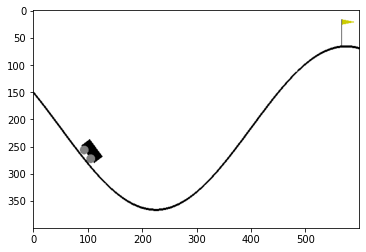

Q-value of the current state left=-57.52 nothing=-57.82 right=-57.70
Action: Left


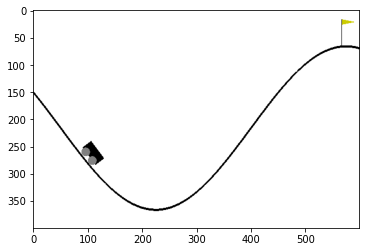

Q-value of the current state left=-57.06 nothing=-57.37 right=-57.25
Action: Left


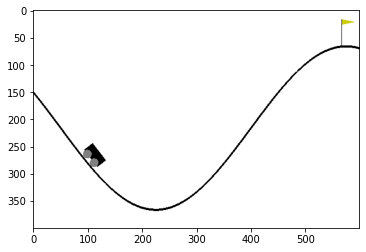

Q-value of the current state left=-56.62 nothing=-56.94 right=-56.81
Action: Left


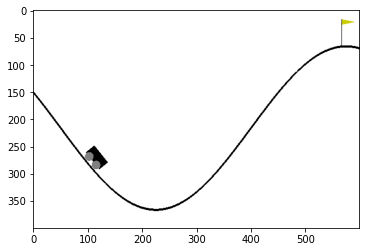

Q-value of the current state left=-56.19 nothing=-56.52 right=-56.39
Action: Left


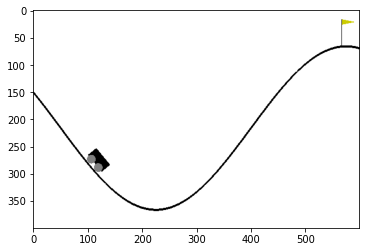

Q-value of the current state left=-55.79 nothing=-56.12 right=-55.98
Action: Left


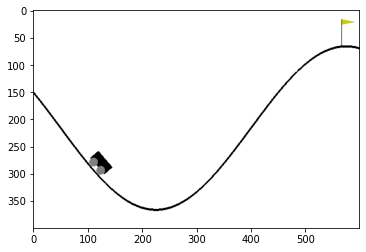

Q-value of the current state left=-54.95 nothing=-55.30 right=-55.16
Action: Left


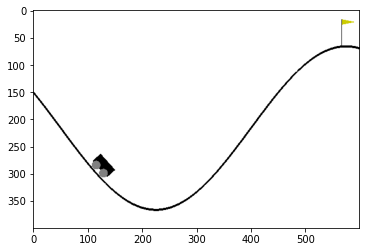

Q-value of the current state left=-54.00 nothing=-54.37 right=-54.22
Action: Left


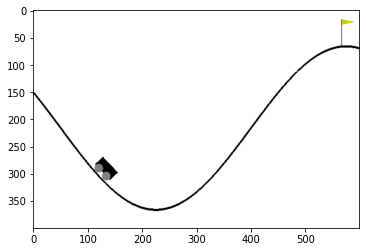

Q-value of the current state left=-53.05 nothing=-53.44 right=-53.28
Action: Left


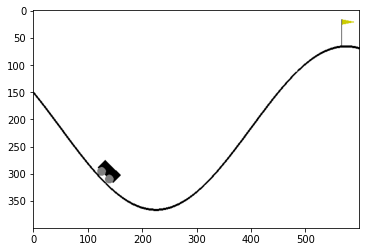

Q-value of the current state left=-52.10 nothing=-52.50 right=-52.33
Action: Left


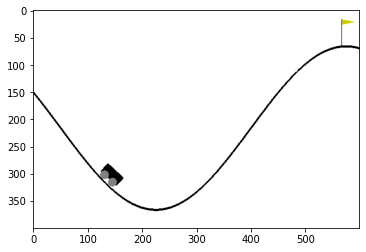

Q-value of the current state left=-51.90 nothing=-52.31 right=-52.14
Action: Left


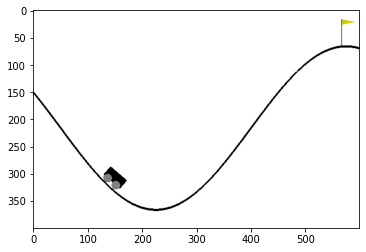

Q-value of the current state left=-51.92 nothing=-52.32 right=-52.16
Action: Left


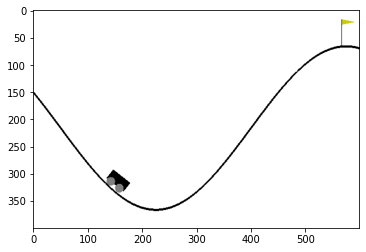

Q-value of the current state left=-51.66 nothing=-52.07 right=-51.90
Action: Left


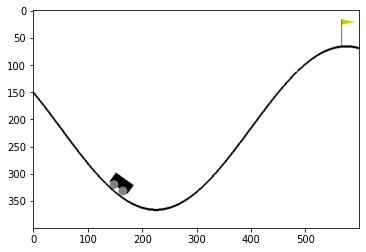

Q-value of the current state left=-52.27 nothing=-52.66 right=-52.48
Action: Left


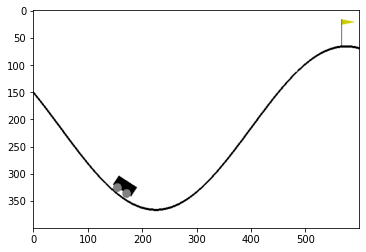

Q-value of the current state left=-53.33 nothing=-53.69 right=-53.50
Action: Left


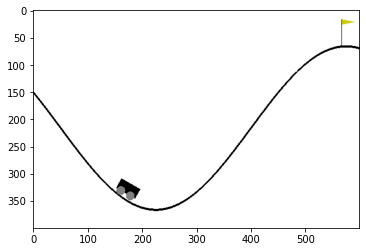

Q-value of the current state left=-54.45 nothing=-54.78 right=-54.57
Action: Left


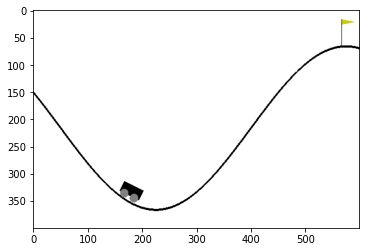

Q-value of the current state left=-55.60 nothing=-55.90 right=-55.67
Action: Left


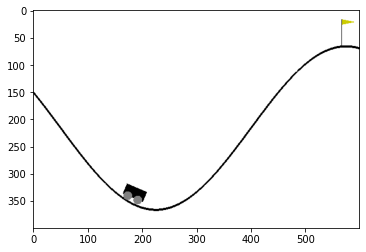

Q-value of the current state left=-56.77 nothing=-57.04 right=-56.79
Action: Left


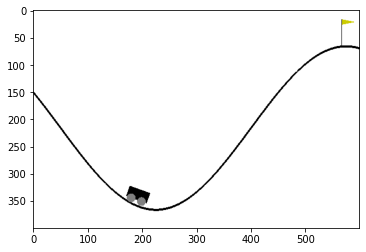

Q-value of the current state left=-57.97 nothing=-58.21 right=-57.94
Action: Right


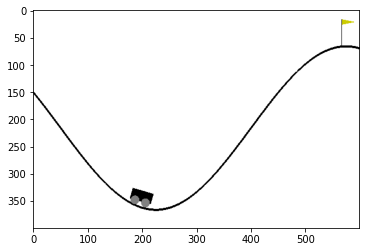

Q-value of the current state left=-58.93 nothing=-59.14 right=-58.85
Action: Right


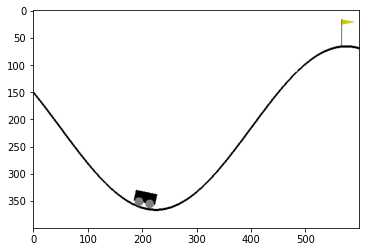

Q-value of the current state left=-59.09 nothing=-59.28 right=-58.99
Action: Right


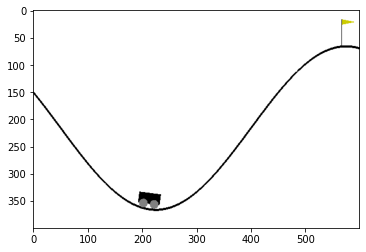

Q-value of the current state left=-58.76 nothing=-58.91 right=-58.62
Action: Right


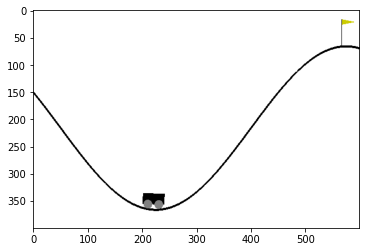

Q-value of the current state left=-58.27 nothing=-58.40 right=-58.10
Action: Right


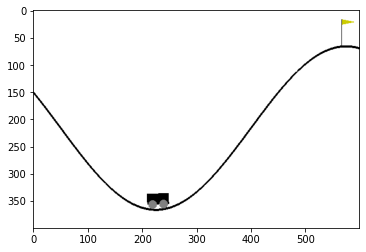

Q-value of the current state left=-57.78 nothing=-57.88 right=-57.58
Action: Right


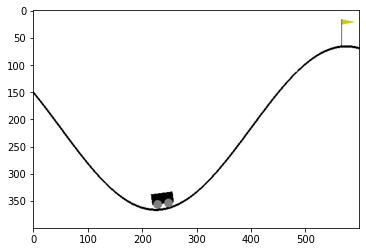

Q-value of the current state left=-58.01 nothing=-58.08 right=-57.76
Action: Right


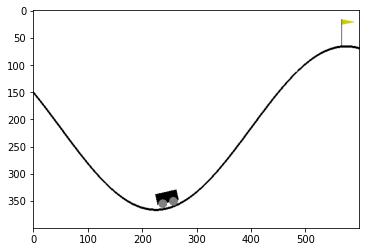

Q-value of the current state left=-58.26 nothing=-58.30 right=-57.96
Action: Right


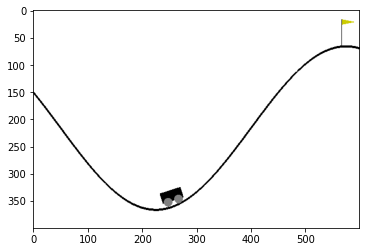

Q-value of the current state left=-58.00 nothing=-58.03 right=-57.68
Action: Right


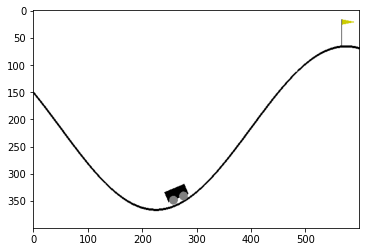

Q-value of the current state left=-57.87 nothing=-57.88 right=-57.52
Action: Right


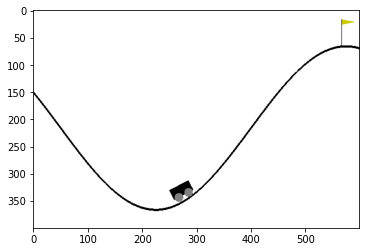

Q-value of the current state left=-58.17 nothing=-58.17 right=-57.79
Action: Right


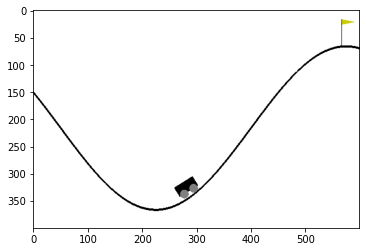

Q-value of the current state left=-57.58 nothing=-57.57 right=-57.18
Action: Right


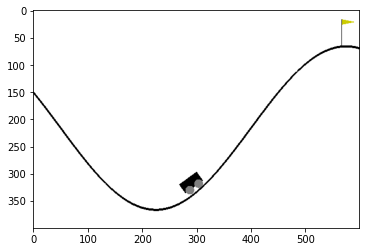

Q-value of the current state left=-56.95 nothing=-56.93 right=-56.54
Action: Right


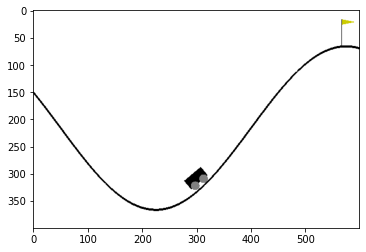

Q-value of the current state left=-56.27 nothing=-56.24 right=-55.86
Action: Right


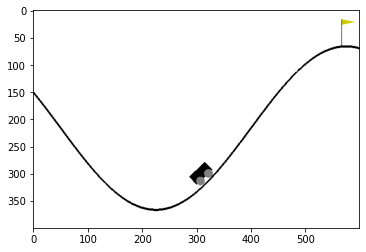

Q-value of the current state left=-55.88 nothing=-55.85 right=-55.47
Action: Right


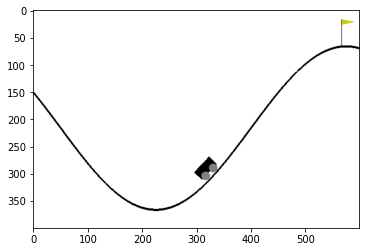

Q-value of the current state left=-56.08 nothing=-56.08 right=-55.76
Action: Right


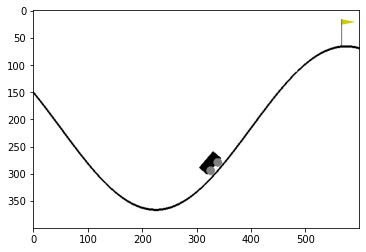

Q-value of the current state left=-56.00 nothing=-56.08 right=-55.86
Action: Right


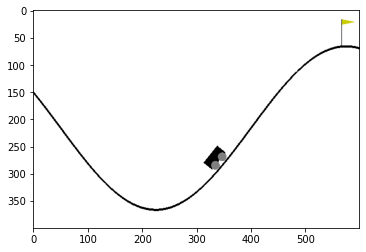

Q-value of the current state left=-55.89 nothing=-56.03 right=-55.93
Action: Left


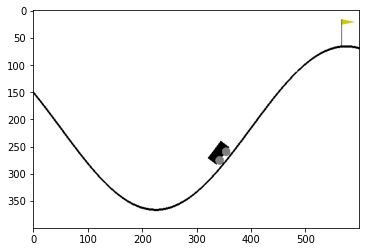

Q-value of the current state left=-55.53 nothing=-55.75 right=-55.79
Action: Left


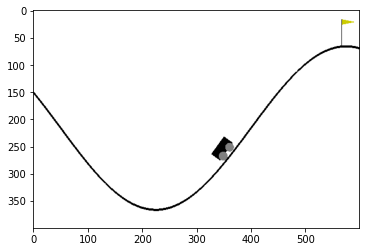

Q-value of the current state left=-55.42 nothing=-55.74 right=-55.94
Action: Left


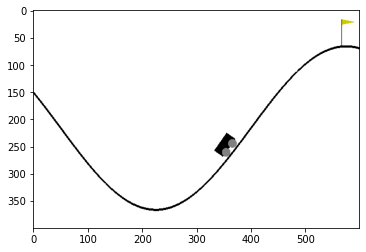

Q-value of the current state left=-54.60 nothing=-54.94 right=-55.13
Action: Left


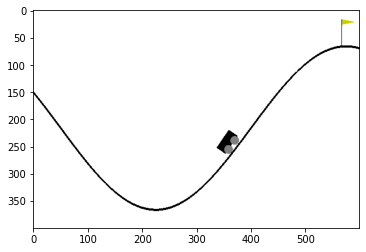

Q-value of the current state left=-53.82 nothing=-54.13 right=-54.28
Action: Left


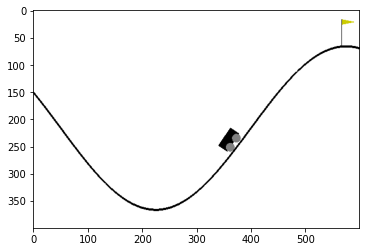

Q-value of the current state left=-52.59 nothing=-52.86 right=-52.95
Action: Left


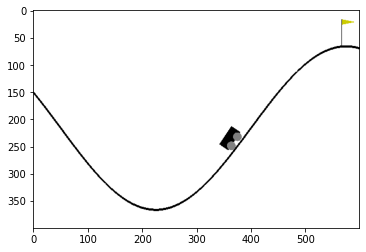

Q-value of the current state left=-50.68 nothing=-50.89 right=-50.92
Action: Left


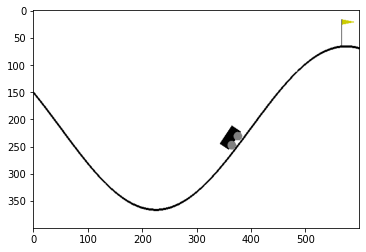

Q-value of the current state left=-48.78 nothing=-48.94 right=-48.92
Action: Left


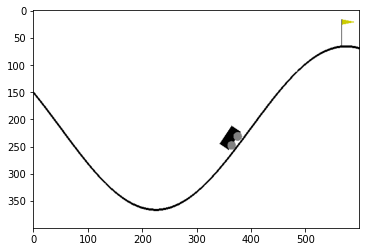

Q-value of the current state left=-46.90 nothing=-47.00 right=-46.93
Action: Left


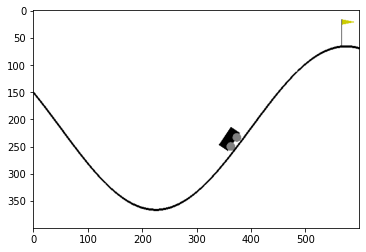

Q-value of the current state left=-45.32 nothing=-45.38 right=-45.26
Action: Right


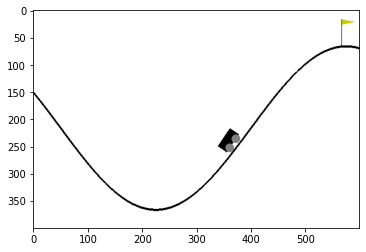

Q-value of the current state left=-44.68 nothing=-44.72 right=-44.59
Action: Right


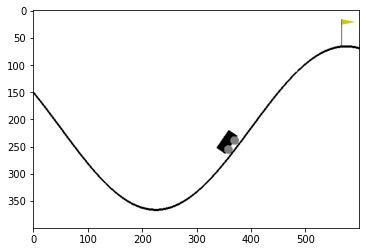

Q-value of the current state left=-44.05 nothing=-44.07 right=-43.92
Action: Right


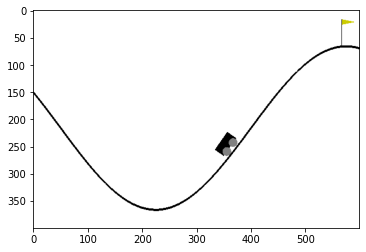

Q-value of the current state left=-43.34 nothing=-43.32 right=-43.16
Action: Right


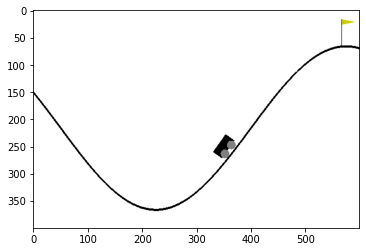

Q-value of the current state left=-43.01 nothing=-42.97 right=-42.85
Action: Right


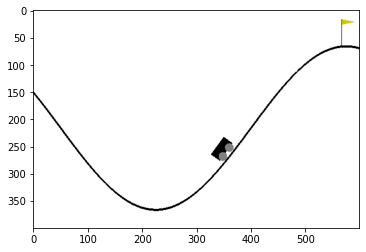

Q-value of the current state left=-42.83 nothing=-42.79 right=-42.74
Action: Right


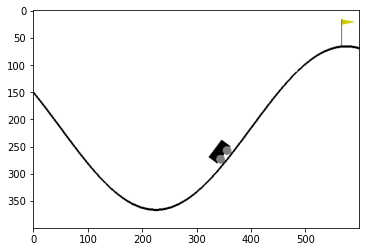

Q-value of the current state left=-42.65 nothing=-42.62 right=-42.63
Action: Nothing


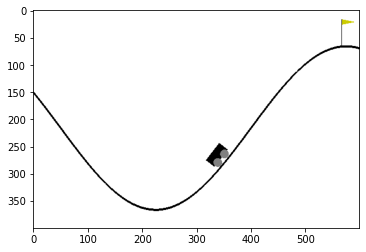

Q-value of the current state left=-43.12 nothing=-43.10 right=-43.19
Action: Nothing


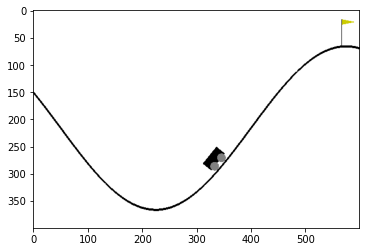

Q-value of the current state left=-44.12 nothing=-44.12 right=-44.28
Action: Nothing


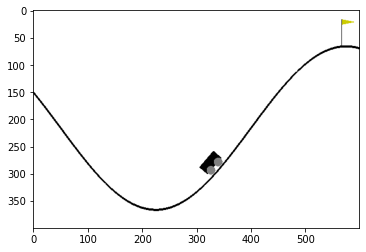

Q-value of the current state left=-45.18 nothing=-45.20 right=-45.43
Action: Left


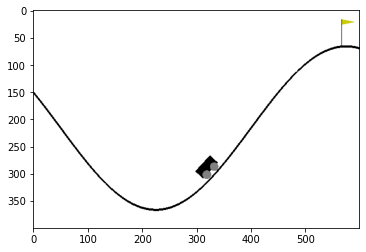

Q-value of the current state left=-45.07 nothing=-45.09 right=-45.34
Action: Left


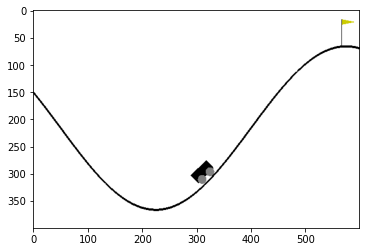

Q-value of the current state left=-44.89 nothing=-44.91 right=-45.16
Action: Left


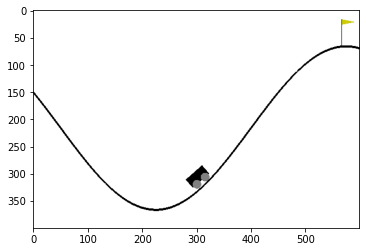

Q-value of the current state left=-46.22 nothing=-46.26 right=-46.61
Action: Left


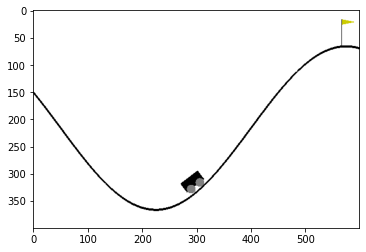

Q-value of the current state left=-47.82 nothing=-47.88 right=-48.34
Action: Left


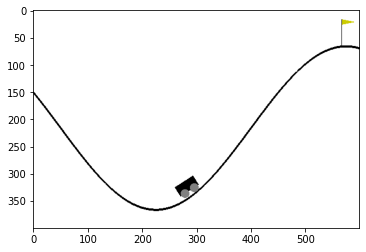

Q-value of the current state left=-48.68 nothing=-48.74 right=-49.15
Action: Left


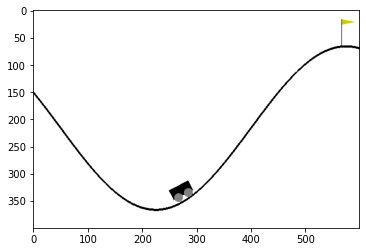

Q-value of the current state left=-49.50 nothing=-49.54 right=-49.85
Action: Left


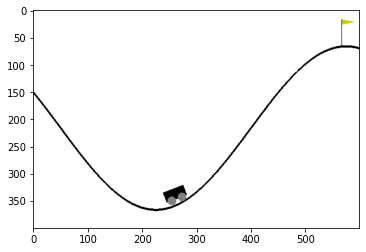

Q-value of the current state left=-51.18 nothing=-51.22 right=-51.47
Action: Left


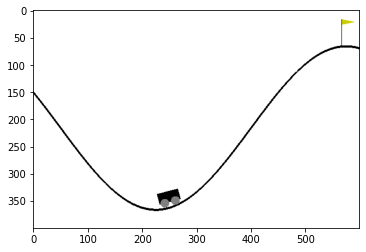

Q-value of the current state left=-52.85 nothing=-52.89 right=-53.09
Action: Left


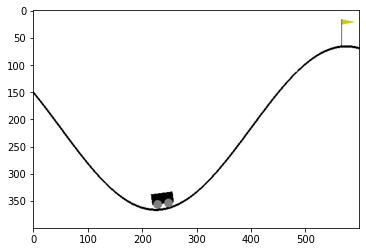

Q-value of the current state left=-53.61 nothing=-53.72 right=-53.90
Action: Left


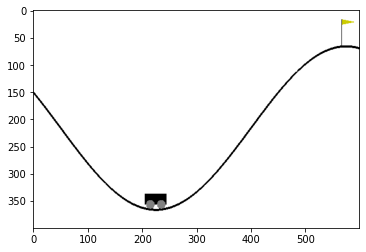

Q-value of the current state left=-52.40 nothing=-52.58 right=-52.66
Action: Left


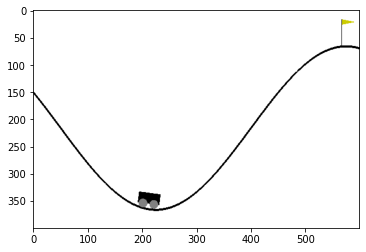

Q-value of the current state left=-51.94 nothing=-52.21 right=-52.33
Action: Left


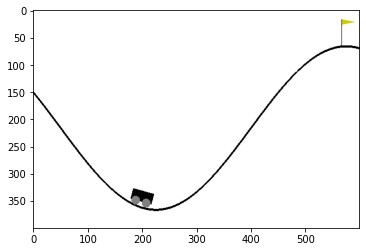

Q-value of the current state left=-52.12 nothing=-52.51 right=-52.77
Action: Left


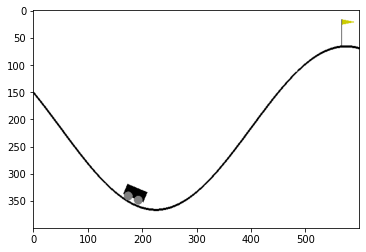

Q-value of the current state left=-52.44 nothing=-52.96 right=-53.37
Action: Left


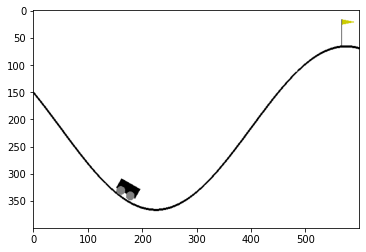

Q-value of the current state left=-52.10 nothing=-52.66 right=-53.12
Action: Left


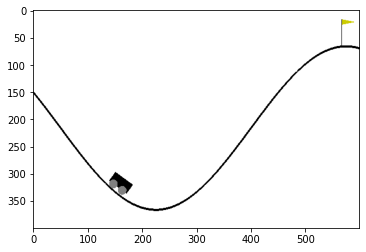

Q-value of the current state left=-50.79 nothing=-51.27 right=-51.66
Action: Left


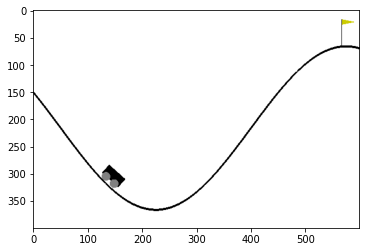

Q-value of the current state left=-50.61 nothing=-50.88 right=-51.02
Action: Left


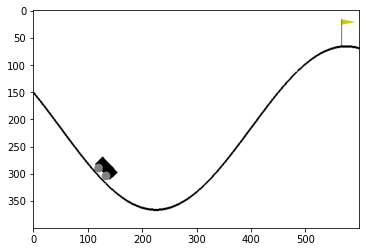

Q-value of the current state left=-49.39 nothing=-49.47 right=-49.37
Action: Right


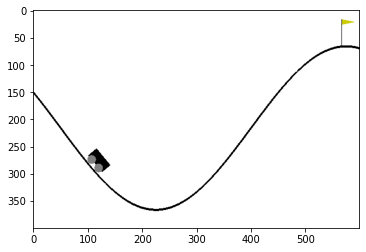

Q-value of the current state left=-50.02 nothing=-50.10 right=-49.99
Action: Right


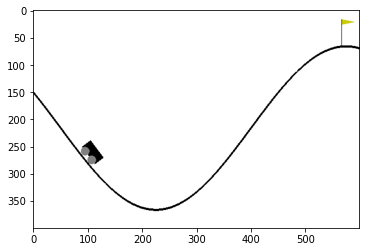

Q-value of the current state left=-49.89 nothing=-49.98 right=-49.87
Action: Right


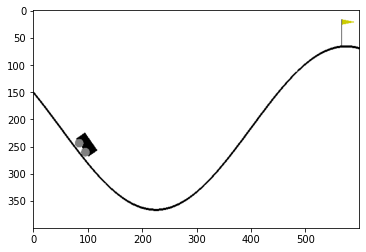

Q-value of the current state left=-49.31 nothing=-49.41 right=-49.29
Action: Right


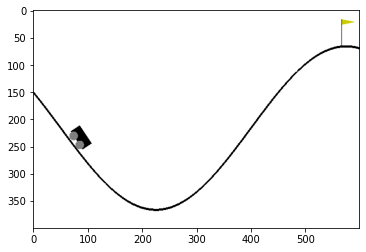

Q-value of the current state left=-51.03 nothing=-51.10 right=-50.92
Action: Right


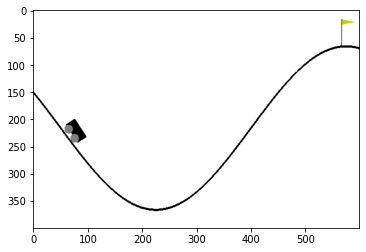

Q-value of the current state left=-50.35 nothing=-50.41 right=-50.17
Action: Right


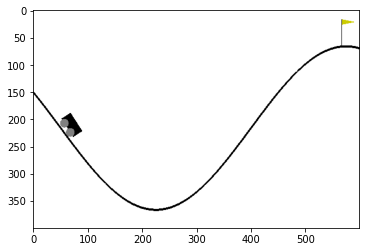

Q-value of the current state left=-49.85 nothing=-49.90 right=-49.63
Action: Right


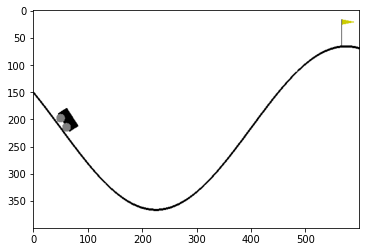

Q-value of the current state left=-50.15 nothing=-50.22 right=-49.95
Action: Right


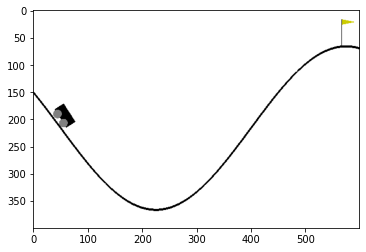

Q-value of the current state left=-50.22 nothing=-50.32 right=-50.05
Action: Right


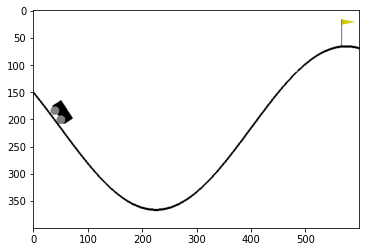

Q-value of the current state left=-49.99 nothing=-50.13 right=-49.89
Action: Right


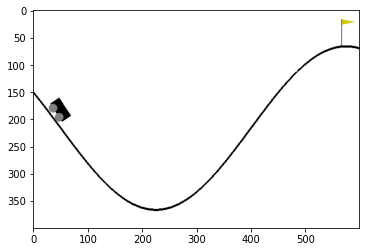

Q-value of the current state left=-49.77 nothing=-49.95 right=-49.72
Action: Right


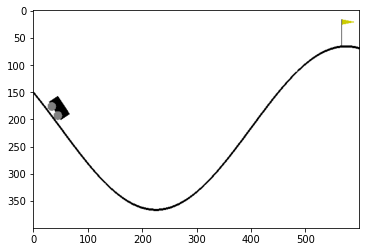

Q-value of the current state left=-49.12 nothing=-49.35 right=-49.15
Action: Left


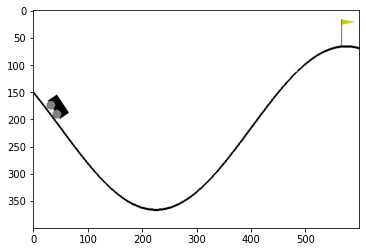

Q-value of the current state left=-48.71 nothing=-48.96 right=-48.77
Action: Left


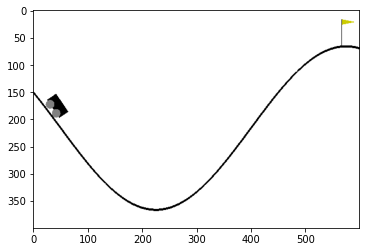

Q-value of the current state left=-47.92 nothing=-48.20 right=-48.04
Action: Left


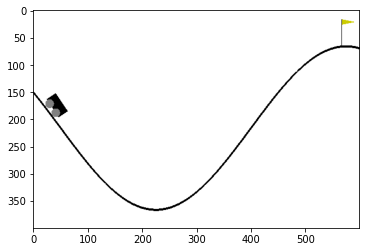

Q-value of the current state left=-47.09 nothing=-47.40 right=-47.25
Action: Left


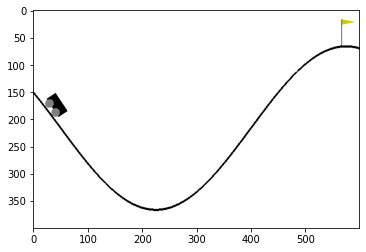

Q-value of the current state left=-46.23 nothing=-46.57 right=-46.44
Action: Left


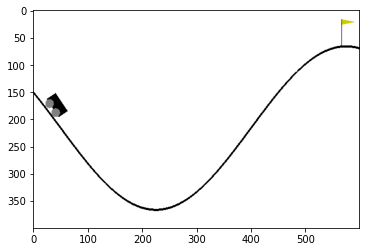

Q-value of the current state left=-46.11 nothing=-46.47 right=-46.35
Action: Left


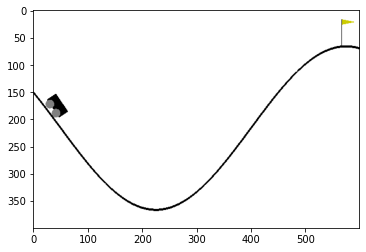

Q-value of the current state left=-46.81 nothing=-47.17 right=-47.05
Action: Left


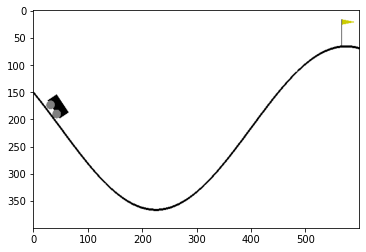

Q-value of the current state left=-47.42 nothing=-47.79 right=-47.66
Action: Left


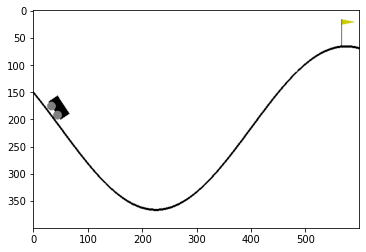

Q-value of the current state left=-48.08 nothing=-48.45 right=-48.32
Action: Left


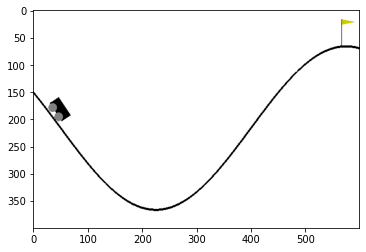

Q-value of the current state left=-48.78 nothing=-49.16 right=-49.02
Action: Left


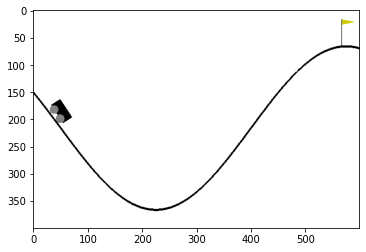

Q-value of the current state left=-49.53 nothing=-49.91 right=-49.77
Action: Left


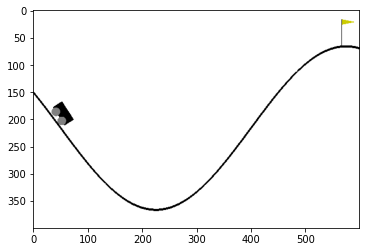

Q-value of the current state left=-50.32 nothing=-50.71 right=-50.56
Action: Left


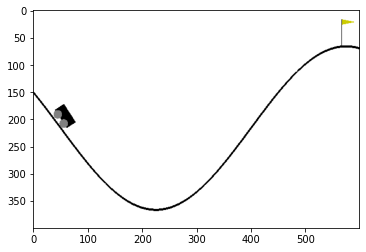

Q-value of the current state left=-51.16 nothing=-51.56 right=-51.40
Action: Left


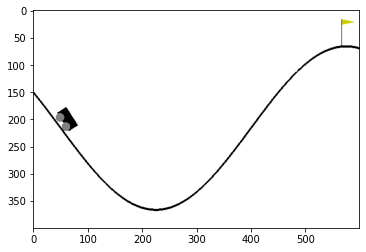

Q-value of the current state left=-52.05 nothing=-52.45 right=-52.28
Action: Left


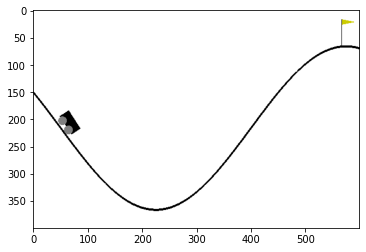

Q-value of the current state left=-52.94 nothing=-53.36 right=-53.18
Action: Left


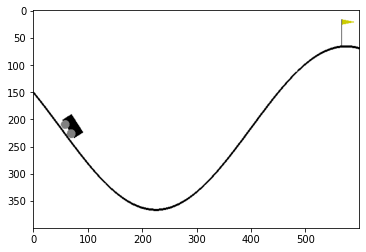

Q-value of the current state left=-53.61 nothing=-54.03 right=-53.85
Action: Left


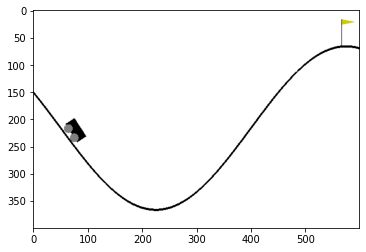

Q-value of the current state left=-53.81 nothing=-54.24 right=-54.05
Action: Left


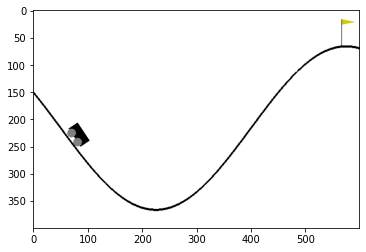

Q-value of the current state left=-53.97 nothing=-54.39 right=-54.20
Action: Left


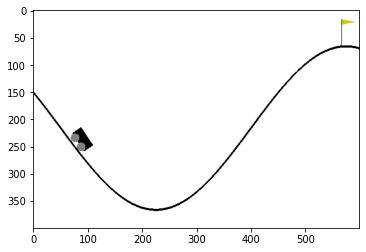

Q-value of the current state left=-54.07 nothing=-54.50 right=-54.31
Action: Left


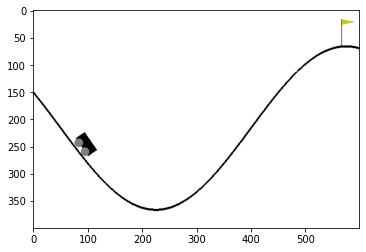

Q-value of the current state left=-54.04 nothing=-54.46 right=-54.28
Action: Left


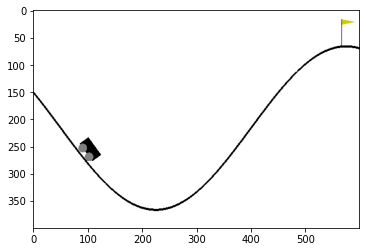

Q-value of the current state left=-53.98 nothing=-54.40 right=-54.22
Action: Left


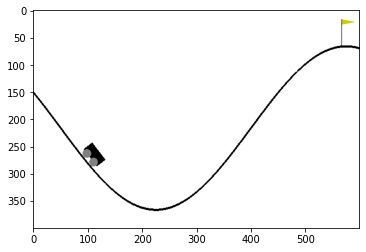

Q-value of the current state left=-53.89 nothing=-54.31 right=-54.13
Action: Left


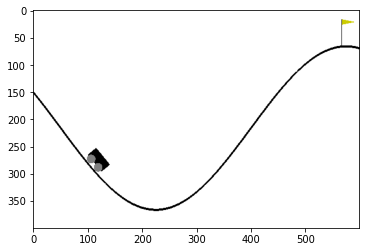

Q-value of the current state left=-53.94 nothing=-54.36 right=-54.17
Action: Left


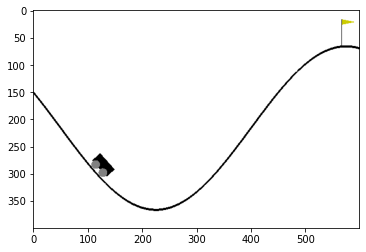

Q-value of the current state left=-53.47 nothing=-53.89 right=-53.71
Action: Left


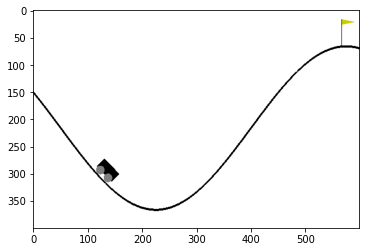

Q-value of the current state left=-52.91 nothing=-53.32 right=-53.14
Action: Left


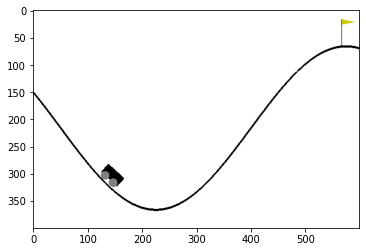

Q-value of the current state left=-52.32 nothing=-52.73 right=-52.56
Action: Left


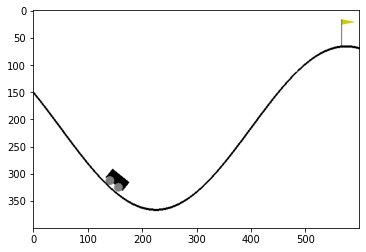

Q-value of the current state left=-51.72 nothing=-52.12 right=-51.96
Action: Left


In [30]:
episode_rewards = []
done = False
i = 0

while not done:
    i += 1

    # Display current state
    plt.imshow(train_env.render(mode="rgb_array"))
    plt.show()

    # Retrieve q-value
    q_values = get_q_values(dqn_vanilla, obs)

    # Take greedy-action
    action, _ = dqn_vanilla.predict(obs, deterministic=True)

    print(f"Q-value of the current state left={q_values[0]:.2f} nothing={q_values[1]:.2f} right={q_values[2]:.2f}")
    print(f"Action: {action_str[action]}")

    obs, reward, done, info = train_env.step(action)

    episode_rewards.append(reward)


**Exercise (3 minutes) - compare estimated initial q-value with actual discounted return**

Compute the discounted return (sum of discounted reward) of the episode and compare it to the initial estimated q-value.

Note: You will need to use the discount factor dqn_model.gamma

In [31]:
sum_discounted_rewards = 0

### YOUR CODE HERE
# Compute the sum of discounted reward for the last episode
# using `episode_rewards` list and `dqn_model.gamma` discount factor

count = 0
for reward in episode_rewards:
  reward = reward * (dqn_vanilla.gamma**count)
  sum_discounted_rewards = sum_discounted_rewards + reward
  count = count + 1

### END OF YOUR CODE

print(f"Sum discounted rewards: {sum_discounted_rewards:.2f}, initial q-value {initial_q_value:.2f}")

Sum discounted rewards: -86.60, initial q-value -67.78


## Exercise (30 minutes): Double DQN

In DQN, the same network is responsible for selecting and estimating the best next action (in the TD-target) and that may lead to over-estimation (the action which q-value is over-estimated will be chosen more often and this slow down training).

To reduce over-estimation, double q-learning (and then double DQN) was proposed. It decouples the action selection from the value estimation.

Concretely, in DQN, the target q-value is defined as:

$$Y^{DQN}_{t} = r_{t+1} + \gamma{Q}\left(s_{t+1}, \arg\max_{a}Q\left(s_{t+1}, a; \mathbb{\theta}_{target}\right); \mathbb{\theta}_{target}\right)$$

where the target network `q_net_target` with parameters $\mathbb{\theta}_{target}$ is used for both action selection and estimation, and can therefore be rewritten:

$$Y^{DQN}_{t} = r_{t+1} + \gamma \max_{a}{Q}\left(s_{t+1}, a; \mathbb{\theta}_{target}\right)$$

Double DQN uses the online network `q_net` with parameters $\mathbb{\theta}_{online}$ to select the action and the target network `q_net_target` to estimate the associated q-values:

$$Y^{DoubleDQN}_{t} = r_{t+1} + \gamma{Q}\left(s_{t+1}, \arg\max_{a}Q\left(s_{t+1}, a; \mathbb{\theta}_{online}\right); \mathbb{\theta}_{target}\right)$$


The goal in this exercise is for you to write the update method for `DoubleDQN`.

You will need to:

1. Sample replay buffer data using `self.replay_buffer.sample(batch_size)`

2. Compute the Double DQN target q-value using the next observations `replay_data.next_observation`, the online network `self.q_net`, the target network `self.q_net_target`, the rewards `replay_data.rewards` and the termination signals `replay_data.dones`. Be careful with the shape of each object ;)

3. Compute the current q-value estimates using the online network `self.q_net`, the current observations `replay_data.observations` and the buffer actions `replay_data.actions`

4. Compute the loss to train the q-network using L2 or Huber loss (`F.smooth_l1_loss`)


Link: https://paperswithcode.com/method/double-q-learning

Paper: https://arxiv.org/abs/1509.06461



In [32]:
from torch.nn import functional as F

class DoubleDQN(DQN):
    def train(self, gradient_steps: int, batch_size: int = 100) -> None:
        # Switch to train mode (this affects batch norm / dropout)
        self.policy.set_training_mode(True)
        # Update learning rate according to schedule
        self._update_learning_rate(self.policy.optimizer)

        losses = []
        for _ in range(gradient_steps):
            ### YOUR CODE HERE
            # Sample replay buffer
            replay_data = self.replay_buffer.sample(batch_size)

            # Do not backpropagate gradient to the target network
            with th.no_grad():
                # Compute the next Q-values using the target network
                next_q_values = self.q_net_target(replay_data.next_observations)
                # Decouple action selection from value estimation
                # Compute q-values for the next observation using the online q net
                next_q_values_online = self.q_net(replay_data.next_observations)
                # Select action with online network
                next_actions_online = th.argmax(next_q_values_online, dim=1)
                # Estimate the q-values for the selected actions using target q network
                next_q_values = th.gather(next_q_values, dim=1, index=next_actions_online.unsqueeze(-1))
               
                # 1-step TD target
                target_q_values = replay_data.rewards + (1 - replay_data.dones) * self.gamma * next_q_values

            # Get current Q-values estimates
            current_q_values = self.q_net(replay_data.observations)


            # Retrieve the q-values for the actions from the replay buffer
            current_q_values = th.gather(current_q_values, dim=1, index=replay_data.actions.long())

            # Check the shape
            assert current_q_values.shape == target_q_values.shape

            # Compute loss (L2 or Huber loss)
            loss = F.huber_loss(target_q_values, current_q_values)

            ### END OF YOUR CODE
            
            losses.append(loss.item())

            # Optimize the q-network
            self.policy.optimizer.zero_grad()
            loss.backward()
            # Clip gradient norm
            th.nn.utils.clip_grad_norm_(self.policy.parameters(), self.max_grad_norm)
            self.policy.optimizer.step()

        # Increase update counter
        self._n_updates += gradient_steps

        self.logger.record("train/n_updates", self._n_updates, exclude="tensorboard")
        self.logger.record("train/loss", np.mean(losses))

## Monitoring Evolution of the Estimated q-value


Here we create a SB3 callback to over-estimate initial q-values and then monitor their evolution over time.

In [33]:
from torch.nn import functional as F

from stable_baselines3.common.callbacks import BaseCallback


class MonitorQValueCallback(BaseCallback):
    """
    Callback to monitor the evolution of the q-value
    for the initial state.
    It allows to artificially over-estimate a q-value for initial states.

    """
    def __init__(self, sample_interval: int = 2500):
        super().__init__()
        self.timesteps = []
        self.max_q_values = []
        self.sample_interval = sample_interval
        n_samples = 512
        env = gym.make("MountainCar-v0")
        # Sample initial states that will be used to monitor the estimated q-value
        self.start_obs = np.array([env.reset() for _ in range(n_samples)])
    
    def _on_training_start(self) -> None:
        # Create overestimation
        obs = th.tensor(self.start_obs, device=self.model.device).float()
        # Over-estimate going left q-value for the initial states
        target_q_values = th.ones((len(obs), 1), device=self.model.device).float() * 100

        for _ in range(100):
            # Get current Q-values estimates
            current_q_values = self.model.q_net(obs)

            # Over-estimate going left
            current_q_values = th.gather(current_q_values, dim=1, index=th.zeros((len(obs), 1), device=self.model.device).long())

            loss = F.mse_loss(current_q_values, target_q_values)

            # Optimize the policy
            self.model.policy.optimizer.zero_grad()
            loss.backward()
            self.model.policy.optimizer.step()

    def _on_step(self) -> bool:
        # Sample q-values
        if self.n_calls % self.sample_interval == 0:
            # Monitor estimated q-values using current model
            obs = th.tensor(self.start_obs, device=self.model.device).float()
            with th.no_grad():
                q_values = self.model.q_net(obs).cpu().numpy()

            self.logger.record("train/max_q_value", float(q_values.max()))
            self.timesteps.append(self.num_timesteps)
            self.max_q_values.append(q_values.max())
        return True

## Evolution of the q-value with initial over-estimation


### DQN

In [34]:
dqn_model = DQN("MlpPolicy",
            "MountainCar-v0",
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=5000,
            learning_starts=1000,
            buffer_size=25000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            tensorboard_log=tensorboard_log,
            seed=102)

Using cpu device
Creating environment from the given name 'MountainCar-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Define the callback

In [35]:
monitor_dqn_value_cb = MonitorQValueCallback()

In [36]:
dqn_model.learn(total_timesteps=int(4e4), callback=monitor_dqn_value_cb)

Logging to data/tb/DQN_4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 975      |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.814    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 672      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 9.44e-05 |
|    n_updates        | 296      |
----------------------------------
----------------------------------
| rollout/            |       

### Double DQN

In [37]:
double_q = DoubleDQN("MlpPolicy",
            "MountainCar-v0",
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=5000,
            learning_starts=1000,
            buffer_size=25000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            tensorboard_log=tensorboard_log,
            seed=102)

Using cpu device
Creating environment from the given name 'MountainCar-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [38]:
monitor_double_q_value_cb = MonitorQValueCallback()

In [39]:
double_q.learn(int(4e4), log_interval=10, callback=monitor_double_q_value_cb)

Logging to data/tb/DQN_5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.767    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 478      |
|    time_elapsed     | 4        |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.193    |
|    n_updates        | 496      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.535    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 401      |
|    time_elapsed     | 9        |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.161 

### Evolution of the max q-value for start states over time

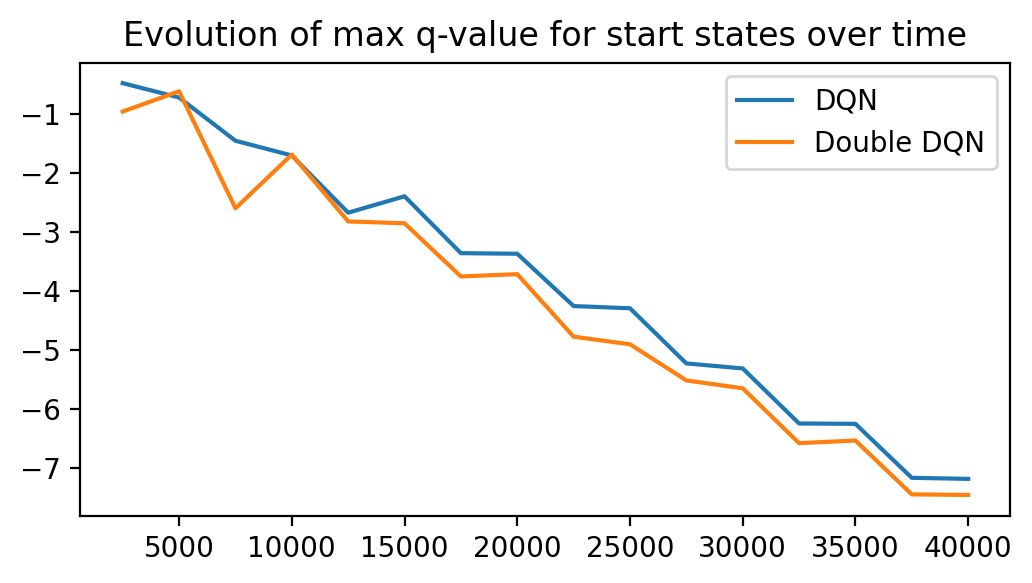

In [40]:
plt.figure(figsize=(6, 3), dpi=200)
plt.title("Evolution of max q-value for start states over time")
plt.plot(monitor_dqn_value_cb.timesteps, monitor_dqn_value_cb.max_q_values, label="DQN")
plt.plot(monitor_double_q_value_cb.timesteps, monitor_double_q_value_cb.max_q_values, label="Double DQN")
plt.legend()